In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
from toobox import quality
from toobox import complexity
import spacy
import ntlk

In [50]:
df = pd.read_csv("training_set_rel3.tsv", sep = '\t',  encoding='latin-1')

In [51]:
df.shape

(12976, 28)

In [52]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [53]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21633,8,Many people believe that laughter can improve...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.isna().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [56]:
df1 = df[df.essay_set == 1]
df1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,1784,1,Do a adults and kids spend to much time on the...,3,4,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,1785,1,My opinion is that people should have computer...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df1.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1783.000000,1783.0,1783.000000,1783.000000,0.0,1783.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,894.310151,1.0,4.260796,4.267527,NaN,8.528323,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,516.143993,0.0,0.842119,0.816287,NaN,1.538565,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,448.500000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,894.000000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1341.500000,1.0,5.000000,5.000000,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1787.000000,1.0,6.000000,6.000000,NaN,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df1 = df1.iloc[:, 0:7]
df1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8
...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,NaN,8
1779,1784,1,Do a adults and kids spend to much time on the...,3,4,NaN,7
1780,1785,1,My opinion is that people should have computer...,4,4,NaN,8
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,NaN,2


In [59]:
df1.fillna(0, inplace=True)
df1.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score
count,1783.000000,1783.0,1783.000000,1783.000000,1783.0,1783.000000
mean,894.310151,1.0,4.260796,4.267527,0.0,8.528323
std,516.143993,0.0,0.842119,0.816287,0.0,1.538565
min,1.000000,1.0,1.000000,1.000000,0.0,2.000000
25%,448.500000,1.0,4.000000,4.000000,0.0,8.000000
50%,894.000000,1.0,4.000000,4.000000,0.0,8.000000
75%,1341.500000,1.0,5.000000,5.000000,0.0,10.000000
max,1787.000000,1.0,6.000000,6.000000,0.0,12.000000


## We make a copy of a table of data called df1 and call it df1_test. It's like taking a snapshot of the information so we can work with it without changing the original.
## After, we remove the columns "essay" and "rater3_domain1" from our snapshot df1_test. It's like cropping out some parts of the picture we don't need.
## Then, this is the heatmap showing how essays and rater domains are related to each other

C:\Users\HP\.conda\envs\my_test_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


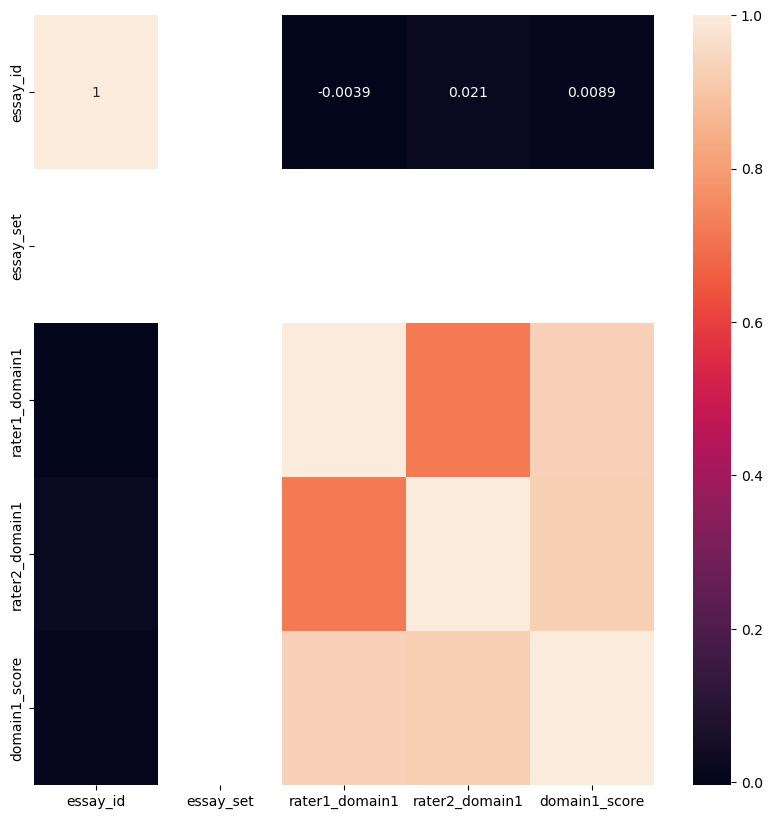

In [60]:
df1_test = df1
df1_test.drop(columns=['essay', 'rater3_domain1'])
plt.figure(figsize=(10,10))
sns.heatmap((df1_test.drop(columns=['essay', 'rater3_domain1'])).corr(),annot=True)
plt.show()


In [61]:
texts = df1['essay'].tolist()
texts_ = df1['essay']

Nombre de tokens : 395
Longueur moyenne des phrases : 24.6875
Nombre de mots sophistiqués : 59
Niveau du texte : Élevé


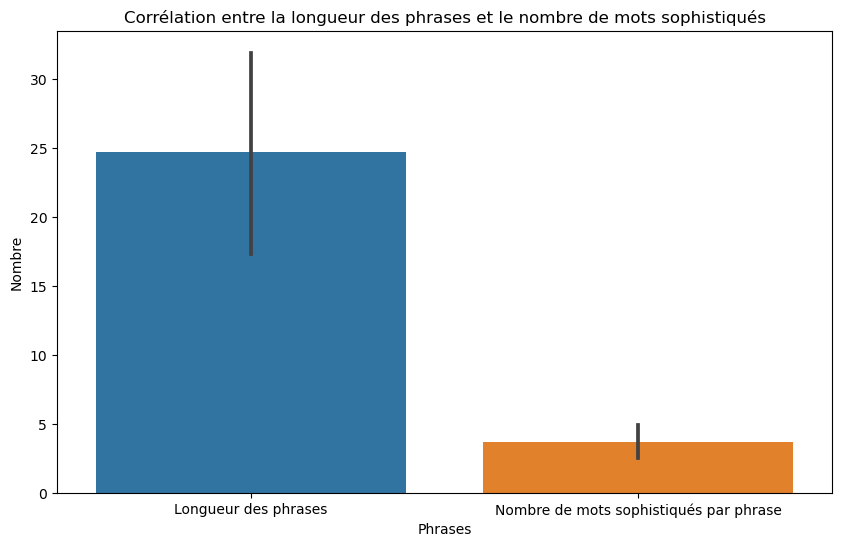

In [62]:
# Charger le modèle linguistique

nlp = spacy.load("en_core_web_sm")
# Texte à analyser
text = texts[0]

# Traiter le texte avec Spacy
doc = nlp(text)

# Calculer la longueur du texte (nombre de tokens)
nombre_tokens = len(doc)

# Calculer la longueur moyenne des phrases
longueur_phrases = [len(sent) for sent in doc.sents]
longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0

# Compter le nombre de mots sophistiqués (par exemple, mots de plus de 6 caractères)
nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)

# Évaluation du niveau du texte
niveau = "Élevé" if longueur_moyenne_phrase > 20 and nombre_mots_sophistiques > 10 else "Bas"

# Affichage des résultats
print(f"Nombre de tokens : {nombre_tokens}")
print(f"Longueur moyenne des phrases : {longueur_moyenne_phrase}")
print(f"Nombre de mots sophistiqués : {nombre_mots_sophistiques}")
print(f"Niveau du texte : {niveau}")

# Récupérer les longueurs des phrases et le nombre de mots sophistiqués par phrase
longueur_phrases = [len(sent) for sent in doc.sents]
nombre_mots_sophistiques_par_phrase = [sum(1 for token in sent if len(token.text) > 6) for sent in doc.sents]

# Créer un dataframe pour faciliter la visualisation
data = {"Longueur des phrases": longueur_phrases, "Nombre de mots sophistiqués par phrase": nombre_mots_sophistiques_par_phrase}
df = pd.DataFrame(data)

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(data=df)
plt.title("Corrélation entre la longueur des phrases et le nombre de mots sophistiqués")
plt.xlabel("Phrases")
plt.ylabel("Nombre")
plt.show()

In [66]:

df1_test['token_nbr'] = df1_test['essay'].apply(quality.get_token_nbr)
df1_test['mean_len'] = df1_test['essay'].apply(quality.get_mean_len)
df1_test['sophisticated_nbr'] = df1_test['essay'].apply(quality.get_sophisticated_nbr)
df1_test['level_of_language'] = df1_test['essay'].apply(quality.level_of_language)
df1_test

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,token_nbr,mean_len,sophisticated_nbr,level_of_language
0,1,1,"Dear local newspaper, I think effects computer...",4,4,0.0,8,395,24.687500,59,Élevé
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,0.0,9,456,22.800000,81,Élevé
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,0.0,7,306,20.400000,53,Élevé
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,0.0,10,576,21.333333,131,Élevé
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,0.0,8,518,17.266667,87,Bas
...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,0.0,8,546,26.000000,59,Élevé
1779,1784,1,Do a adults and kids spend to much time on the...,3,4,0.0,7,235,11.190476,33,Bas
1780,1785,1,My opinion is that people should have computer...,4,4,0.0,8,314,17.444444,51,Bas
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,0.0,2,16,16.000000,2,Bas


In [68]:


df1_test['lexical_score'] = df1_test['essay'].apply(complexity.lexical_score)
df1_test

NameError: name 'nlp' is not defined

In [ ]:

#from nltk.corpus import words

# Liste des mots anglais du corpus de NLTK
#liste_mots_anglais = set()
nltk.download('gutenberg')
#nltk.corpus.reader.wordlist.WordListCorpusReader.words
# Calcul des mots sophistiqués dans l'essai
#mots_essai = nltk.word_tokenize(df1_test['essay'][0])
#mots_sophistiques = [mot for mot in mots_essai if mot.lower() not in liste_mots_anglais]

#print("Mots sophistiqués :", mots_sophistiques)
#df1_test

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
texte = "Le chat mange la souris."

tokens = word_tokenize(texte)

pos_tags = nltk.pos_tag(tokens)

for word, pos_tag in pos_tags:
    print(f"{word}: {pos_tag}")


In [ ]:
df2 = df[df.essay_set == 2]
df2 = df2.iloc[:, 0:10]
df2

In [ ]:
df2.fillna(0, inplace=True)
df2

In [ ]:
df2.describe()

In [ ]:
df3 = df[df.essay_set == 3]
df3 = df3.iloc[:, 0:7]
df3

In [ ]:
df3.fillna(0, inplace=True)
df3

In [ ]:
df3.describe()

In [ ]:
df4 = df[df.essay_set == 4]
df4 = df4.iloc[:, 0:7]
df4

In [ ]:
df4.fillna(0, inplace=True)
df4

In [ ]:
df4.describe()

In [ ]:
df5 = df[df.essay_set == 5]
df5 = df5.iloc[:, 0:7]
df5

In [ ]:
df5.fillna(0, inplace=True)
df5

In [ ]:
df5.describe()

In [ ]:
df6 = df[df.essay_set == 6]
df6 = df6.iloc[:, 0:7]
df6

In [ ]:
df6.fillna(0, inplace=True)
df6

In [ ]:
df6.describe()

In [ ]:
df7 = df[df.essay_set == 7]
df7 = df7.iloc[:, 0:14]
df7

In [ ]:
df7.fillna(0, inplace=True)
df7

In [ ]:
df7.describe()

In [ ]:
df8 = df[df.essay_set == 8]
#df8 = df8.iloc[:, 0:14]
df8

In [ ]:
df8.fillna(0, inplace=True)
df8

In [ ]:
df8.describe()

In [ ]:
import nltk
from nltk.corpus import wordnet

#nltk.download('wordnet')



word = "work"
lexical_field = generate_lexical_field(word)

for i in range(len(lexical_field)):
    lexical_field[i] = lexical_field[i].replace('_', ' ')

print(f"Champ lexical de '{word}': {lexical_field}")


In [ ]:
doc = nlp("I like You")
list(doc)

In [ ]:
res = [str(i) for i in doc]
res